In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [2]:
def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv("BinSize_d{}.csv".format(binsize))

    station_locations_by_hash = df[df["hash"] == hashid]

    lons = station_locations_by_hash["LONGITUDE"].tolist()
    lats = station_locations_by_hash["LATITUDE"].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c="r", alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,"fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89")

In [3]:
df = pd.read_csv("fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")             

In [4]:
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [5]:
df["Date"] = pd.to_datetime(df.Date) 
df["Day"] = pd.DatetimeIndex(df.Date).day
df["Month"] = pd.DatetimeIndex(df.Date).month
df["Year"] = pd.DatetimeIndex(df.Date).year

In [6]:
df = df.set_index(["Month", "Day"])
df.sort_index(inplace = True)
leap_year = df.loc[2, 29]
df = df[~df.index.isin(leap_year.index)]

In [7]:
df_2015 = df[df.Year == 2015]
df = df[df.Year  != 2015]

In [8]:
df.head()

ID       Date Element  Data_Value  Year
Month Day                                                  
1     1    USC00207308 2006-01-01    TMIN          -6  2006
      1    USC00207308 2006-01-01    TMAX          22  2006
      1    USC00208080 2006-01-01    TMIN          -6  2006
      1    USC00208080 2006-01-01    TMAX          33  2006
      1    USC00205563 2006-01-01    TMAX          33  2006

In [9]:
temp_min = df[df.Element == "TMIN"]
temp_max = df[df.Element == "TMAX"]
df_2015_min = df_2015[df_2015.Element == "TMIN"]
df_2015_max = df_2015[df_2015.Element == "TMAX"]

In [11]:
temp_min.head()

ID       Date Element  Data_Value  Year
Month Day                                                  
1     1    USC00207308 2006-01-01    TMIN          -6  2006
      1    USC00208080 2006-01-01    TMIN          -6  2006
      1    USC00205822 2005-01-01    TMIN         -17  2005
      1    USC00200842 2006-01-01    TMIN           0  2006
      1    USC00202308 2005-01-01    TMIN         -17  2005

In [10]:
temp_max.head()

ID       Date Element  Data_Value  Year
Month Day                                                  
1     1    USC00207308 2006-01-01    TMAX          22  2006
      1    USC00208080 2006-01-01    TMAX          33  2006
      1    USC00205563 2006-01-01    TMAX          33  2006
      1    USC00202308 2005-01-01    TMAX         150  2005
      1    USC00200842 2006-01-01    TMAX          11  2006

In [12]:
df_2015_min.head()

ID       Date Element  Data_Value  Year
Month Day                                                  
1     1    USC00207308 2015-01-01    TMIN        -106  2015
      1    USW00004848 2015-01-01    TMIN         -82  2015
      1    USW00014833 2015-01-01    TMIN         -88  2015
      1    USC00202308 2015-01-01    TMIN        -106  2015
      1    USW00014853 2015-01-01    TMIN         -71  2015

In [13]:
df_2015_max.head()

ID       Date Element  Data_Value  Year
Month Day                                                  
1     1    USC00207308 2015-01-01    TMAX         -44  2015
      1    USW00004848 2015-01-01    TMAX          -5  2015
      1    USW00014833 2015-01-01    TMAX         -21  2015
      1    USC00202308 2015-01-01    TMAX         -50  2015
      1    USW00014853 2015-01-01    TMAX          11  2015

In [14]:
temp_min = temp_min.groupby(["Month", "Day"])["Data_Value"].min()
temp_max = temp_max.groupby(["Month", "Day"])["Data_Value"].max()
df_2015_min = df_2015_min.groupby(["Month", "Day"]).min()[["Data_Value", "Date"]]
df_2015_max = df_2015_max.groupby(["Month", "Day"]).max()[["Data_Value", "Date"]]

In [15]:
temp_min.head()

Month  Day
1      1     -160
       2     -267
       3     -267
       4     -261
       5     -150
Name: Data_Value, dtype: int64

In [16]:
temp_max.head()

Month  Day
1      1      156
       2      139
       3      133
       4      106
       5      128
Name: Data_Value, dtype: int64

In [22]:
df_2015_min.head()

Data_Value       Date
Month Day                       
1     1          -133 2015-01-01
      2          -122 2015-01-02
      3           -67 2015-01-03
      4           -88 2015-01-04
      5          -155 2015-01-05

In [18]:
df_2015_max.head()

Data_Value       Date
Month Day                       
1     1            11 2015-01-01
      2            39 2015-01-02
      3            39 2015-01-03
      4            44 2015-01-04
      5            28 2015-01-05

In [19]:
months = df_2015.Date.unique()

In [20]:
scatter_min = df_2015_min[df_2015_min.iloc[:, 0] < temp_min]
scatter_max = df_2015_max[df_2015_max.iloc[:, 0] > temp_max]

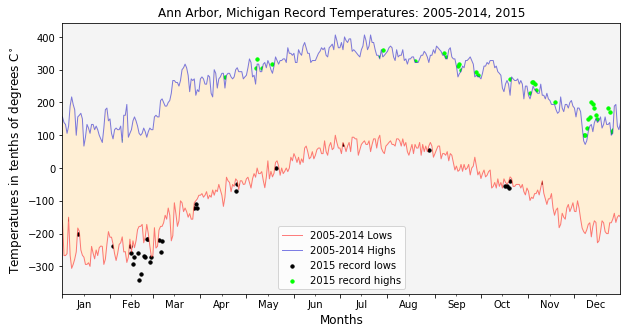

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(months[0],  months[-1])
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
plt.plot(months, temp_min.values,
         alpha=0.5, label="2005-2014 Lows", c="#FF0000", lw=1)
plt.plot(months, temp_max.values,
         alpha=0.5, label="2005-2014 Highs", c="#0000CD", lw=1)
plt.scatter(scatter_min.Date.values, scatter_min.Data_Value.values,
            c="k", label="2015 record lows", s=11)
plt.scatter(scatter_max.Date.values, scatter_max.Data_Value.values,
            c="#00FF00", label="2015 record highs", s=11)
plt.fill_between(months, temp_min, temp_max, facecolor="#FFEFD5")
plt.title("Ann Arbor, Michigan Record Temperatures: 2005-2014, 2015")
plt.xlabel("Months", fontsize=12)
plt.ylabel("Temperatures in tenths of degrees C$^{\circ}$ ", fontsize=12)
mpl.rc("axes", facecolor="F4F4F4")
plt.legend(loc="lower center", facecolor="w")
plt.savefig("weather_plot")